# Datos de consigna

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [40]:
# Consigna
Vo = np.array([48,16])
Vd = 300
AL = 4700e-9# H/n**2
Io = 1      # A

In [41]:
# PWM SG3525
# Supply Voltage = 40 Vmax

D = [0,0.45]
D = 0.25
K_D = D/(1-D)

In [42]:
# Relaciones de vueltas
N_2vN_1 = 1/(Vd/Vo*K_D)
#N_2vN_1 = N_2vN_1/N_2vN_1.min()

#N_1 = N_2vN_1*K_D/Vo*Vd
N_1 = 25
N_2 = N_1 * N_2vN_1

In [43]:
# Escala de vueltas
K = 2
N_all = np.array([N_1,N_2[0],N_2[1]])*K

In [71]:
# Parámetros del núcleo
B_sat = 200e-3  #T
R = 1/AL
A = 280e-6      #mm**2
A_min = 351e-6 # mm**2
I_rms = .2   #A

In [65]:
# Parámetros de Switching
F_SW = 75e3  # Hz
T_S = 1/F_SW
skin = 66/np.sqrt(F_SW)

d_max = 2*skin

In [66]:
from sympy import Symbol
from sympy.solvers import solve

In [72]:
a0 = 0.5*Vd*D*T_S/A_min
a1 = B_sat
a2 = I_rms/R/A

In [68]:
N_i = Symbol('N1')
solve(a2*N_i**2-a1*N_i+a0)


[7.97390572980926, 66.7069453340205]

In [ ]:
N1_range = [8,66]

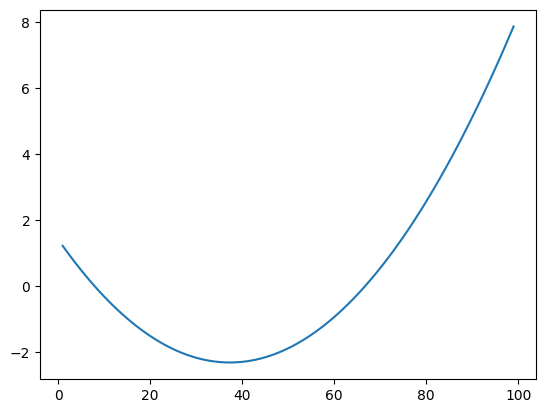

In [69]:
nn = np.arange(1,100)
bb = nn**2*I_rms/R/A_min-nn*B_sat+0.5*Vd*D*T_S/A_min

plt.plot(nn, bb)
plt.show()